In [28]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

sns.set_theme(style='ticks')

In [96]:
# Loading Data

dataset = load_dataset('lukebarousse/data_jobs') 
df = dataset['train'].to_pandas()

In [100]:
df_DA_USA = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()  #analysing only Data Analyst jobs in the  USA


In [101]:
#cleaning the dataset
df_DA_USA['job_posted_date'] = pd.to_datetime(df_DA_USA['job_posted_date']) #convert to datetime
df_DA_USA['job_skills'] = df_DA_USA['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #skills column is a strings of list. so converting to a list 
df_DA_USA_exploded = df_DA_USA.explode('job_skills')  #exploding the skills column to see better each skills

In [84]:
df_DA_USA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55720 entries, 36 to 785685
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        55720 non-null  object        
 1   job_title              55720 non-null  object        
 2   job_location           55341 non-null  object        
 3   job_via                55678 non-null  object        
 4   job_schedule_type      55042 non-null  object        
 5   job_work_from_home     55720 non-null  bool          
 6   search_location        55720 non-null  object        
 7   job_posted_date        55720 non-null  datetime64[ns]
 8   job_no_degree_mention  55720 non-null  bool          
 9   job_health_insurance   55720 non-null  bool          
 10  job_country            55720 non-null  object        
 11  salary_rate            8230 non-null   object        
 12  salary_year_avg        4732 non-null   float64       
 13  sala

In [103]:
#add a month column
df_DA_USA_exploded['job_month'] = df_DA_USA['job_posted_date'].dt.strftime('%b')


In [104]:
df_DA_USA_pivoted = pd.pivot_table(df_DA_USA_exploded, index= 'job_month', columns= 'job_skills', aggfunc= 'size', fill_value= 0)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_DA_USA_pivoted = df_DA_USA_pivoted.reindex(months)
df_DA_USA_pivoted

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_month,,,,,,,,,,,,,,,,,,,,,
Jan,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
Feb,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
Mar,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
Apr,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
May,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
Jun,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
Jul,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
Aug,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
Sep,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [105]:
#create a new row called total to see the sum of each skill
df_DA_USA_pivoted.loc['Total'] = df_DA_USA_pivoted.sum()
df_DA_USA_pivoted

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_month,,,,,,,,,,,,,,,,,,,,,
Jan,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
Feb,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
Mar,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
Apr,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
May,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
Jun,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
Jul,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
Aug,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
Sep,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [106]:
df_DA_USA_pivoted = df_DA_USA_pivoted[df_DA_USA_pivoted.loc['Total'].sort_values(ascending= False).index]   #sort descending using the total row
df_DA_USA_pivoted = df_DA_USA_pivoted.drop('Total')  #drop the total row
df_DA_USA_pivoted

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_month,,,,,,,,,,,,,,,,,,,,,
Jan,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,1,0,0,0,0,0,0
Feb,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
Mar,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
Apr,845,577,462,421,292,258,238,143,133,122,...,0,0,0,0,0,0,0,0,0,0
May,706,490,367,336,251,206,219,92,119,98,...,1,0,0,0,0,0,0,0,0,0
Jun,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,0,0,0,0,0,0
Jul,560,431,296,292,190,182,188,101,101,62,...,0,0,1,0,1,0,0,0,0,1
Aug,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
Sep,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
"""df_a = df_DA_USA_pivoted.copy()
df_a['Total'] = df_a.sum(axis= 1)"""

In [107]:
DA_USA_totals = df_DA_USA.groupby('job_month').size()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
DA_USA_totals = DA_USA_totals.reindex(months)
DA_USA_totals

job_month
Jan    1816
Feb    1284
Mar    1362
Apr    1369
May    1156
Jun    1207
Jul     955
Aug    1414
Sep     856
Oct    1002
Nov     848
Dec     817
dtype: int64

pd.df.div() method

The pd.DataFrame.div() method in pandas is used for element-wise division of a DataFrame by another DataFrame, Series, or scalar (single value).

Syntax:
DataFrame.div(other, axis='columns', level=None, fill_value=None)
Arguments:
other → The value to divide by (can be a DataFrame, Series, or scalar).

axis → Determines the direction of division:

0 (or "index") → Divide each row by the corresponding value in other.

1 (or "columns") → Divide each column by the corresponding value in other (default).

level → Used when dividing DataFrames with MultiIndex.

fill_value → Fills missing values before performing division to avoid NaN results.

In [108]:
#to get percentage
df_DA_USA_percent = df_DA_USA_pivoted.div(DA_USA_totals/100, axis= 0)
df_DA_USA_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.000000,0.000000,0.055066,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.086505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.000000,0.104712,0.000000,0.104712,0.000000,0.000000,0.0000,0.000000,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.116822,0.000000


In [110]:
df_plot = df_DA_USA_percent.iloc[:,:5]
df_plot

job_skills,sql,excel,tableau,python,power bi
job_month,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542
Feb,60.903427,42.367601,31.775701,29.439252,23.520249
Mar,58.883994,42.584435,33.994126,29.368576,20.337739
Apr,61.723886,42.147553,33.747261,30.752374,21.329438
May,61.072664,42.387543,31.747405,29.065744,21.712803
Jun,61.474731,40.679370,32.725766,32.808616,22.535211
Jul,58.638743,45.130890,30.994764,30.575916,19.895288
Aug,55.445545,45.332390,33.946252,32.531825,20.650636
Sep,56.658879,39.252336,32.359813,29.556075,21.378505


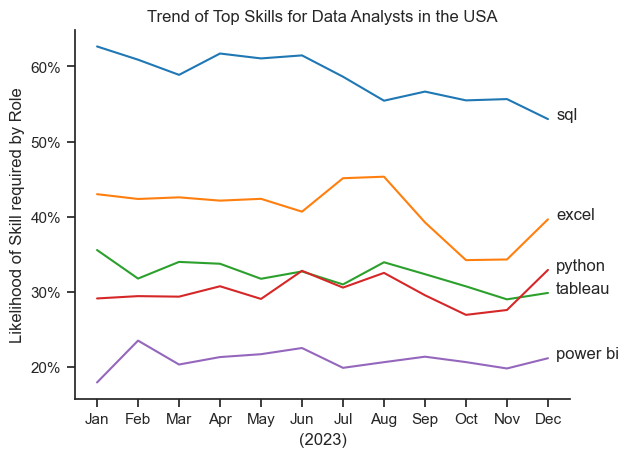

In [130]:
#plot
from matplotlib.ticker import PercentFormatter  
sns.lineplot(data= df_plot, dashes= False, palette= 'tab10', legend= False)
plt.title('Trend of Top Skills for Data Analysts in the USA')
plt.xlabel('(2023)')
plt.ylabel('Likelihood of Skill required by Role')
ax= plt.gca()
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"{int(y)}%"))
ax.yaxis.set_major_formatter(PercentFormatter(decimals= 0))
sns.despine()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])